In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Utils

In [ ]:
def imshow(*args, figsize=10, to_rgb=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    if to_rgb:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    if title is not None:
        assert len(title) == len(images), "Please provide a title for each image."
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        plt.imshow(images[i-1], cmap = 'gray')
        plt.axis('off')

In [ ]:
def plotImage(image, nth, title, row = 1):
  plt.subplot(row, 5, nth)
  plt.imshow(image, cmap='gray')
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

In [ ]:
def plot(image, nth, title):
  plt.subplot(1, 5, nth)
  plt.plot(image)
  plt.subplots_adjust(right=3.5, wspace=0.1)
  plt.title(title)

# Histogram functions

In [ ]:
# calculate histogram od an image by counting each amount of gray level in picture
def histogram(image):
  w, h = image.shape
  hist = [0.0] * 256
  for i in range(h):
    for j in range(w):
      pixel = image[i,j]
      hist[pixel] += 1

  # averaging
  for k in range(256):
    hist[k] /=(h*w)
  return np.array(hist)

In [ ]:
# Cumulative distribution function on histogram
def cfdCalculate(histogramArr):
  sum = [0.0] * len(histogramArr)
  for i in range(len(histogramArr)):
    for j in range(i+1):
      sum[i] += histogramArr[j]

  return sum

In [ ]:
def equlizedHistogram(image):
  hist = histogram(image)
  cfdSum = np.array(cfdCalculate(hist))
  # max gray level is 255
  newCdf = np.uint8(255 * cfdSum)
  m , n = image.shape
  newImage = np.zeros_like(image)

  # create a new image with updated cdf
  for i in range(n):
    for j in range(m):
      newImage[i, j] = newCdf[image[i, j]]

  return newImage


# Practice 2

## Practice 2.1.1

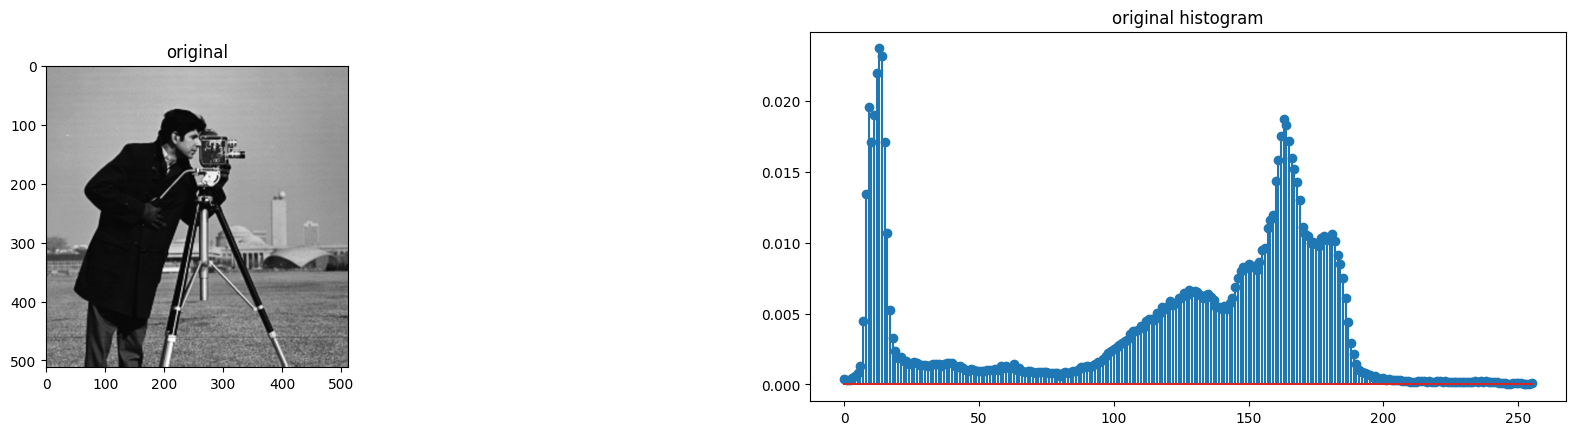

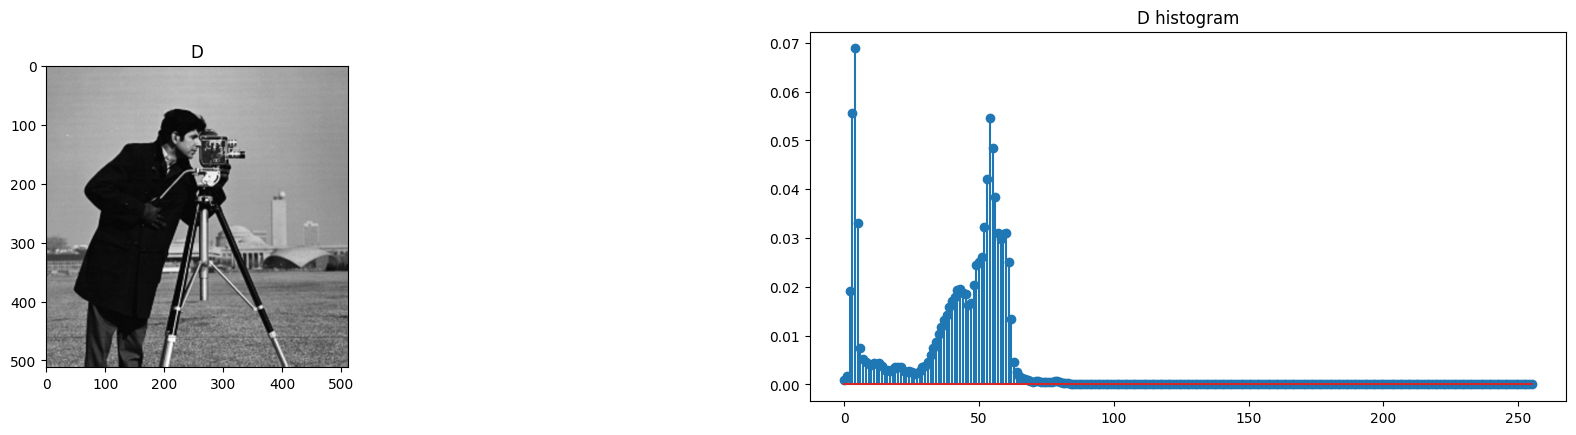

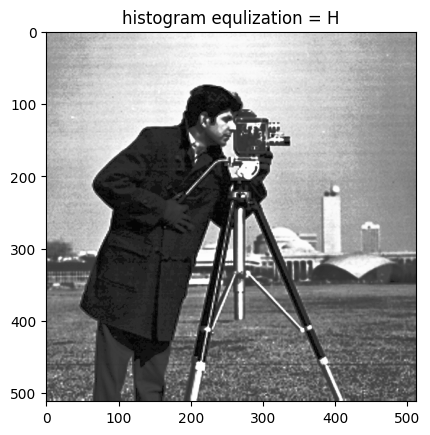

In [ ]:
# load image
cameraMan = cv2.imread('Camera Man.bmp', cv2.IMREAD_GRAYSCALE)

# 2.1.1.1 decrease intensity value divided by 3
D = cameraMan // 3

# 2.1.1.2 plot main image and D histograms
plotImage(cameraMan, 1, 'original')

plt.subplot(122)
plt.title('original histogram')
plt.stem(histogram(cameraMan))
plt.subplots_adjust(right=2.5, wspace=0.01)
plt.show()

plotImage(D, 1, 'D')

plt.subplot(122)
plt.title('D histogram')
plt.stem(histogram(D))
plt.subplots_adjust(right=2.5, wspace=0.01)
plt.show()

# 2.1.1.3 calculate histogram equlization on D
H = equlizedHistogram(D)
plotImage(H, 1, 'histogram equlization = H')
